## Stage 1: Installing dependencies and notebook gpu setup

## Stage 2: Importing dependencies for the project

In [27]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10

%matplotlib inline
tf.__version__

'2.7.0'

## Stage 3: Dataset preprocessing

### Loading the Cifar10 dataset

In [28]:
#Setting class names for the dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [29]:
#Loading the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

### Image normalization

In [30]:
X_train = X_train / 255.0

In [31]:
X_train.shape

(50000, 32, 32, 3)

In [32]:
X_test = X_test / 255.0

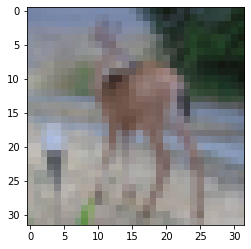

In [33]:
plt.imshow(X_test[100])

## Stage 4: Building a Convolutional neural network

### Defining the model

In [34]:
model = tf.keras.models.Sequential()

### Adding the first CNN Layer

CNN layer hyper-parameters:
- filters: 32
- kernel_size:3
- padding: same
- activation: relu
- input_shape: (32, 32, 3)


In [35]:
model.add(tf.keras.layers.Conv2D(filters=94, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]))

### Adding the second CNN Layer and max pool layer

CNN layer hyper-parameters:
- filters: 32
- kernel_size:3
- padding: same
- activation: relu

MaxPool layer hyper-parameters:
- pool_size: 2
- strides: 2
- padding: valid

In [36]:
model.add(tf.keras.layers.Conv2D(filters=94, kernel_size=3, padding="same", activation="relu"))

In [37]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Adding the third CNN Layer

CNN layer hyper-parameters:

    filters: 64
    kernel_size:3
    padding: same
    activation: relu
    input_shape: (32, 32, 3)


In [38]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

###  Adding the fourth CNN Layer and max pool layer

CNN layer hyper-parameters:

    filters: 64
    kernel_size:3
    padding: same
    activation: relu

MaxPool layer hyper-parameters:

    pool_size: 2
    strides: 2
    padding: valid


In [39]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

In [40]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Adding the Flatten layer

In [41]:
model.add(tf.keras.layers.Flatten())

### Adding the first Dense layer

Dense layer hyper-parameters:
- units/neurons: 128
- activation: relu

In [42]:
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [43]:
tf.keras.layers.Dropout(0.2)

### Adding the second Dense layer (output layer)

Dense layer hyper-parameters:

 - units/neurons: 10 (number of classes)
 - activation: softmax


In [44]:
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 94)        2632      
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 94)        79618     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 94)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 64)        54208     
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

### Compiling the model

#### sparse_categorical_accuracy
sparse_categorical_accuracy checks to see if the maximal true value is equal to the index of the maximal predicted value.

https://stackoverflow.com/questions/44477489/keras-difference-between-categorical-accuracy-and-sparse-categorical-accuracy 

In [46]:
opt = tf.keras.optimizers.Adamax( learning_rate = 10**-3)

In [47]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=opt, metrics=["sparse_categorical_accuracy"])

### Training the model

In [48]:
model.fit(X_train, y_train, epochs=18)

Epoch 1/18
1563/1563 [==============================] - 29s 18ms/step - loss: 1.4404 - sparse_categorical_accuracy: 0.4806
Epoch 2/18
1563/1563 [==============================] - 29s 18ms/step - loss: 0.9949 - sparse_categorical_accuracy: 0.6532
Epoch 3/18
1563/1563 [==============================] - 28s 18ms/step - loss: 0.8048 - sparse_categorical_accuracy: 0.7217
Epoch 4/18
1563/1563 [==============================] - 28s 18ms/step - loss: 0.6845 - sparse_categorical_accuracy: 0.7622
Epoch 5/18
1563/1563 [==============================] - 29s 18ms/step - loss: 0.5852 - sparse_categorical_accuracy: 0.7957
Epoch 6/18
1563/1563 [==============================] - 28s 18ms/step - loss: 0.5020 - sparse_categorical_accuracy: 0.8252
Epoch 7/18
1563/1563 [==============================] - 29s 18ms/step - loss: 0.4172 - sparse_categorical_accuracy: 0.8556
Epoch 8/18
1563/1563 [==============================] - 29s 18ms/step - loss: 0.3432 - sparse_categorical_accuracy: 0.8791
Epoch 9/18
1563/

### Model evaluation and prediction

In [49]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 1.7143 - sparse_categorical_accuracy: 0.7640


In [50]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.7639999985694885
